<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Предосмотр-данных" data-toc-modified-id="Предосмотр-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Предосмотр данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Исследовательский-анализ" data-toc-modified-id="Исследовательский-анализ-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Исследовательский анализ</a></span></li><li><span><a href="#Подготовка-выборок-для-обучения-моделей" data-toc-modified-id="Подготовка-выборок-для-обучения-моделей-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Подготовка выборок для обучения моделей</a></span></li></ul></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение моделей</a></span><ul class="toc-item"><li><span><a href="#Модель-линейной-регрессии" data-toc-modified-id="Модель-линейной-регрессии-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Модель линейной регрессии</a></span></li><li><span><a href="#Модель-дерева-решений" data-toc-modified-id="Модель-дерева-решений-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Модель дерева решений</a></span></li><li><span><a href="#Модель-случайного-леса" data-toc-modified-id="Модель-случайного-леса-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Модель случайного леса</a></span></li><li><span><a href="#Модель-CatBoost" data-toc-modified-id="Модель-CatBoost-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Модель CatBoost</a></span></li><li><span><a href="#Модель-LightGBM" data-toc-modified-id="Модель-LightGBM-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Модель LightGBM</a></span></li></ul></li><li><span><a href="#Анализ-моделей" data-toc-modified-id="Анализ-моделей-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ моделей</a></span><ul class="toc-item"><li><span><a href="#Модель-линейной-регрессии" data-toc-modified-id="Модель-линейной-регрессии-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Модель линейной регрессии</a></span></li><li><span><a href="#Модель-дерева-решений" data-toc-modified-id="Модель-дерева-решений-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Модель дерева решений</a></span></li><li><span><a href="#Модель-случайного-леса" data-toc-modified-id="Модель-случайного-леса-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Модель случайного леса</a></span></li><li><span><a href="#Модель-CatBoost" data-toc-modified-id="Модель-CatBoost-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Модель CatBoost</a></span></li><li><span><a href="#Модель-LightGBM" data-toc-modified-id="Модель-LightGBM-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Модель LightGBM</a></span></li></ul></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Определение стоимости автомобилей

Сервис по продаже автомобилей с пробегом «Не бит, не крашен» разрабатывает приложение для привлечения новых клиентов. В нём можно быстро узнать рыночную стоимость своего автомобиля. В вашем распоряжении исторические данные: технические характеристики, комплектации и цены автомобилей. Вам нужно построить модель для определения стоимости. 

Заказчику важны:

- качество предсказания;
- скорость предсказания;
- время обучения.

**План проекта:**
- подготовим данные (проведем предобработку, исследовательский анализ и подготовим выборки)
- обучим модели
- проанализируем характеристики и качество моделей и выберем лучшую
- напишем вывод

In [1]:
# импорт всех нужных библиотек и метрик
import pandas as pd
import re
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostRegressor
from sklearn.model_selection import cross_val_score
!pip install lightgbm
import lightgbm
print(lightgbm.__version__)
from sklearn.pipeline import Pipeline
import time

## Подготовка данных

### Предосмотр данных

In [2]:
auto = pd.read_csv('/datasets/autos.csv', parse_dates = ['DateCrawled', 'DateCreated', 'LastSeen'])

In [3]:
display(auto.head(10))
print(auto.info())
auto_shape = auto.shape
print(f'Размер датафрема: {auto_shape}')

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31,0,60437,2016-04-06 10:17:21
5,2016-04-04 17:36:23,650,sedan,1995,manual,102,3er,150000,10,petrol,bmw,yes,2016-04-04,0,33775,2016-04-06 19:17:07
6,2016-04-01 20:48:51,2200,convertible,2004,manual,109,2_reihe,150000,8,petrol,peugeot,no,2016-04-01,0,67112,2016-04-05 18:18:39
7,2016-03-21 18:54:38,0,sedan,1980,manual,50,other,40000,7,petrol,volkswagen,no,2016-03-21,0,19348,2016-03-25 16:47:58
8,2016-04-04 23:42:13,14500,bus,2014,manual,125,c_max,30000,8,petrol,ford,NaN,2016-04-04,0,94505,2016-04-04 23:42:13
9,2016-03-17 10:53:50,999,small,1998,manual,101,golf,150000,0,NaN,volkswagen,NaN,2016-03-17,0,27472,2016-03-31 17:17:06


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   DateCrawled        354369 non-null  datetime64[ns]
 1   Price              354369 non-null  int64         
 2   VehicleType        316879 non-null  object        
 3   RegistrationYear   354369 non-null  int64         
 4   Gearbox            334536 non-null  object        
 5   Power              354369 non-null  int64         
 6   Model              334664 non-null  object        
 7   Kilometer          354369 non-null  int64         
 8   RegistrationMonth  354369 non-null  int64         
 9   FuelType           321474 non-null  object        
 10  Brand              354369 non-null  object        
 11  Repaired           283215 non-null  object        
 12  DateCreated        354369 non-null  datetime64[ns]
 13  NumberOfPictures   354369 non-null  int64   

**Вывод по предосмотру данных:**
- нужно привести названия столбцов в норму
- тип столбцов с датой и временем - object, возможно придется его поменять
- в столбце NumberOfPictures на первый взгляд все значения - 0
- наблюдаются значения NaN
- наблюдаются пропуски

*Перед предобработкой исправим названия столбцов а так же удалим неинформативные столбцы*

In [4]:
# изменим названия столбцов 
auto = auto.rename(columns=lambda x: re.sub(r'(?<!^)([A-Z])', r'_\1', x).lower())
print(auto.columns)

Index(['date_crawled', 'price', 'vehicle_type', 'registration_year', 'gearbox',
       'power', 'model', 'kilometer', 'registration_month', 'fuel_type',
       'brand', 'repaired', 'date_created', 'number_of_pictures',
       'postal_code', 'last_seen'],
      dtype='object')


*С названиями столбцов теперь все в порядке. Далее удалим неинформативные столбцы*

In [5]:
# сначала удалим категориальные неинформативные столбцы
auto = auto.drop(['postal_code', 'date_created', 
                  'last_seen', 'registration_month', 'date_crawled'], axis = 1)


# так же рассмотрим количественный столбец number_of_pictires, 
# который казался подозрительным в предосмотре данных
print(auto['number_of_pictures'].value_counts())

0    354369
Name: number_of_pictures, dtype: int64


*Видно столбец с количеством фотографий тут лишний, удалим его*

In [6]:
auto = auto.drop(['number_of_pictures'], axis = 1)

In [7]:
# проверим, что все неинформативные столбцы удалены
display(auto.head(1))

,price,vehicle_type,registration_year,gearbox,power,model,kilometer,fuel_type,brand,repaired
0,480,NaN,1993,manual,0,golf,150000,petrol,volkswagen,NaN


###  Предобработка данных

*В предобработке стоит рассмотреть 3 момента:*

**1) Наличие пропусков**

In [8]:
print(auto.isna().sum())

price                    0
vehicle_type         37490
registration_year        0
gearbox              19833
power                    0
model                19705
kilometer                0
fuel_type            32895
brand                    0
repaired             71154
dtype: int64


*Только в repaired пропуски занимают 20%, мы не можем позволить себе удалить все строки с пропусками, ведь тогда потеряем огромный объем информации. Поступим так: удалим только те строки, которые насчитывают 3 из 5 пропусков* 

In [9]:
# удалим строки с пропусками
auto = auto.dropna(subset=['vehicle_type', 'fuel_type', 'model', 'repaired', 'gearbox'], thresh = 3)
print(auto.shape)
display(auto.head(10))

(336341, 10)


,price,vehicle_type,registration_year,gearbox,power,model,kilometer,fuel_type,brand,repaired
0,480,NaN,1993,manual,0,golf,150000,petrol,volkswagen,NaN
1,18300,coupe,2011,manual,190,NaN,125000,gasoline,audi,yes
2,9800,suv,2004,auto,163,grand,125000,gasoline,jeep,NaN
3,1500,small,2001,manual,75,golf,150000,petrol,volkswagen,no
4,3600,small,2008,manual,69,fabia,90000,gasoline,skoda,no
5,650,sedan,1995,manual,102,3er,150000,petrol,bmw,yes
6,2200,convertible,2004,manual,109,2_reihe,150000,petrol,peugeot,no
7,0,sedan,1980,manual,50,other,40000,petrol,volkswagen,no
8,14500,bus,2014,manual,125,c_max,30000,petrol,ford,NaN
9,999,small,1998,manual,101,golf,150000,NaN,volkswagen,NaN


*Разобрались с пропусками, так еще и огромный объем информации не потеряли*

**2) наличие явных дубликатов**

In [10]:
print(auto.duplicated().sum())

43440


*Наверное можно было бы поверить в совпадение некоторых строк - одинаковые машины конечно же есть, но вот совпадение пробега... В общем удалим все явные дубликаты*

In [11]:
auto = auto.drop_duplicates()
print(auto.duplicated().sum())

0


**3) Наличие неявных дубликатов в категориальных данных**

In [12]:
list_columns = []
auto_type = auto['vehicle_type'].dtype
for i in auto.columns:
    if auto[i].dtype == auto_type:
        list_columns.append(i)
for j in list_columns:
    print(auto[j].unique())
    print()
auto = auto.query("model != '601' and model != 'kalina' and model != 'range_rover_evoque' and model != 'rangerover' and model != 'serie_2' and model != 'trabant'")

[nan 'coupe' 'suv' 'small' 'sedan' 'convertible' 'bus' 'wagon' 'other']

['manual' 'auto' nan]

['golf' nan 'grand' 'fabia' '3er' '2_reihe' 'other' 'c_max' '3_reihe'
 'passat' 'navara' 'ka' 'twingo' 'a_klasse' 'scirocco' '5er' 'meriva'
 'arosa' 'c4' 'civic' 'transporter' 'punto' 'e_klasse' 'clio' 'kadett'
 'kangoo' 'one' 'fortwo' '1er' 'b_klasse' 'signum' 'astra' 'a8' 'jetta'
 'polo' 'fiesta' 'c_klasse' 'micra' 'vito' 'sprinter' '156' 'escort'
 'forester' 'xc_reihe' 'scenic' 'a4' 'a1' 'combo' 'focus' 'tt' 'corsa'
 'a6' 'jazz' 'omega' 'slk' '7er' '80' '147' 'z_reihe' 'sportage' 'sorento'
 'v40' 'ibiza' 'mustang' 'eos' 'touran' 'getz' 'insignia' 'a3' 'almera'
 'megane' 'lupo' 'r19' 'zafira' 'caddy' 'mondeo' 'cordoba' 'colt'
 'impreza' 'vectra' 'berlingo' 'tiguan' 'i_reihe' 'sharan' '6_reihe'
 'panda' 'up' 'seicento' 'ceed' '5_reihe' 'yeti' 'octavia' 'mii'
 'rx_reihe' '6er' 'modus' 'fox' 'matiz' 'beetle' 'rio' 'touareg' 'logan'
 'spider' 'cuore' 's_max' 'a2' 'galaxy' 'c3' 'viano' 's_klass

*По неявным дубликатам можно заметить в столбце тип топлива значения petrol и gasoline - они по факту одинаковые, так что перезапишем эти значения*

In [13]:
auto['fuel_type'].replace({'gasoline' : 'petrol'}, inplace = True)
print(auto['fuel_type'].unique())

['petrol' nan 'lpg' 'other' 'hybrid' 'cng' 'electric']


**1.1) Наличие пропусков**

*Теперь заполним пропуски значениями other или unknow, в зависиимости от того, что больше подойдет по смыслу*

In [14]:
auto['vehicle_type'].fillna('other', inplace = True)

auto['fuel_type'].fillna('other', inplace = True)

auto['model'].fillna('other', inplace = True)

auto['repaired'].fillna('unknow', inplace = True)

auto['gearbox'].fillna('unknow', inplace = True)

In [15]:
print(auto.shape)

(292576, 10)


**Вывод по предобработке данных:**
- Названия столбцов были преведены в норму
- Неиформативные столбцы были удалены
- Были обработаны
    - пропуски
    - явные дубликаты
    - неявные дубликаты
- Размер таблицы теперь составляет 292901 строк на 10 столбцов  

### Исследовательский анализ

*Этот этап нужен нам для того, чтобы обработать аномальные значения в количественных данных*

count    292576.000000
mean       4631.409856
std        4597.637684
min           0.000000
25%        1200.000000
50%        2950.000000
75%        6750.000000
max       20000.000000
Name: price, dtype: float64

0       6847
1500    4240
500     4226
1200    3541
1000    3511
        ... 
2965       1
4758       1
8080       1
3730       1
8188       1
Name: price, Length: 3675, dtype: int64


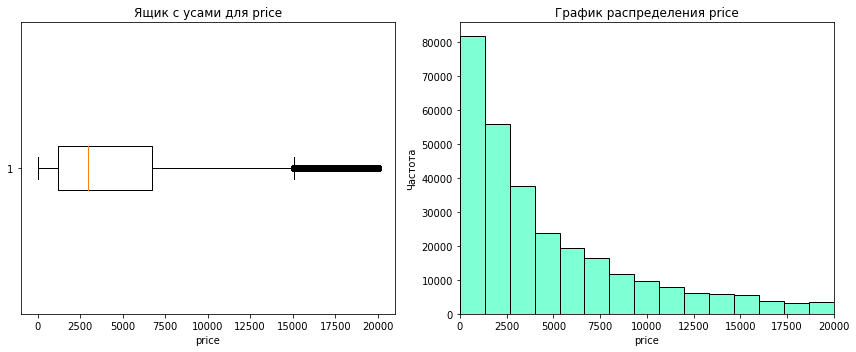

count    292576.000000
mean       2003.186451
std          25.660402
min        1000.000000
25%        1999.000000
50%        2003.000000
75%        2008.000000
max        9000.000000
Name: registration_year, dtype: float64

1999    18602
2000    18127
2005    17985
2001    17059
2006    16952
        ...  
1944        1
1946        1
1947        1
1949        1
1000        1
Name: registration_year, Length: 108, dtype: int64


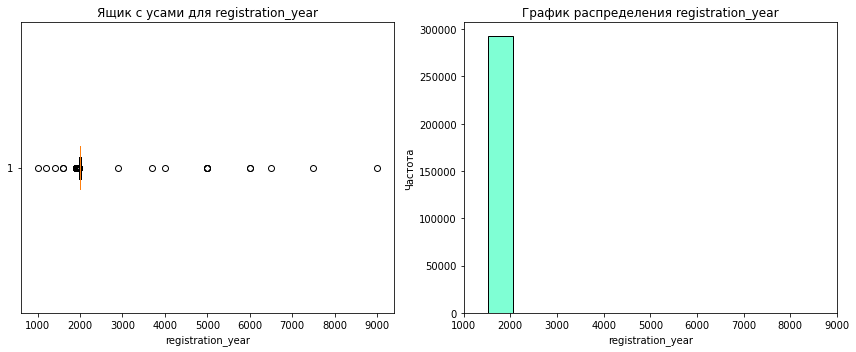

count    292576.000000
mean        114.256053
std         201.840695
min           0.000000
25%          75.000000
50%         105.000000
75%         143.000000
max       20000.000000
Name: power, dtype: float64

0        26986
75       18722
150      12328
60       12312
90       10869
         ...  
3199         1
1405         1
1149         1
11011        1
2172         1
Name: power, Length: 700, dtype: int64


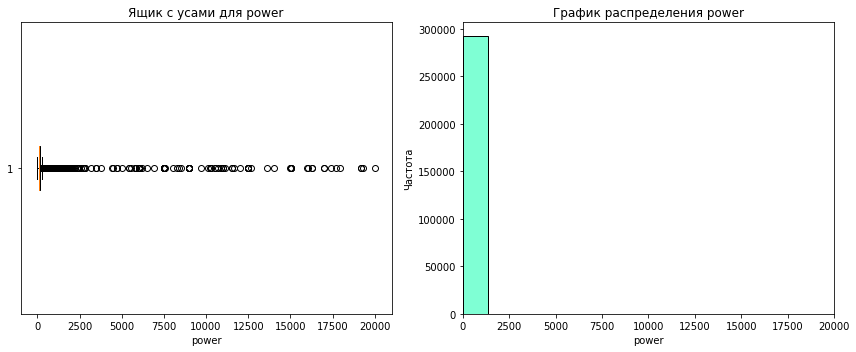

count    292576.000000
mean     127717.481953
std       37567.191750
min        5000.000000
25%      125000.000000
50%      150000.000000
75%      150000.000000
max      150000.000000
Name: kilometer, dtype: float64

150000    192671
125000     31718
100000     12816
90000      10237
80000       8875
70000       7732
60000       6455
50000       5496
40000       4302
5000        4062
30000       3845
20000       3399
10000        968
Name: kilometer, dtype: int64


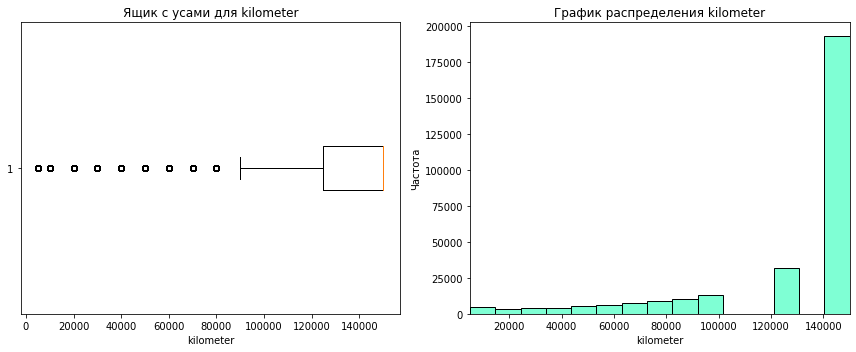

In [16]:
# построим графики распределения и ящики с усами 
int_columns = auto['price'].dtype
for i in auto.columns:
    if auto[i].dtype == int_columns:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
        
        print(auto[i].describe())
        print()
        print(auto[i].value_counts())

        # Ящик с усами
        ax1.boxplot(auto[i], vert=False)
        ax1.set_title(f'Ящик с усами для {i}')
        ax1.set_xlabel(i)

        # Гистограмма
        ax2.hist(auto[i], bins=15, color='aquamarine', edgecolor='black')
        ax2.set_xlim(auto[i].min(), auto[i].max() + 0.5)
        ax2.set_title(f'График распределения {i}')
        ax2.set_xlabel(i)
        ax2.set_ylabel('Частота')

        plt.tight_layout() 
        plt.show()
        
        

*Теперь по порядку*

**1) price**

In [17]:
# удалим те строки, где цена равна 0
auto = auto.query('price > 0')
print(auto['price'].value_counts())

1500     4240
500      4226
1200     3541
1000     3511
2500     3490
         ... 
10791       1
4759        1
2965        1
4758        1
8188        1
Name: price, Length: 3674, dtype: int64


**2) registration_year**

In [18]:
# здесь рассмотрим поподробней
print(auto['registration_year'].unique())

[1993 2011 2004 2001 2008 1995 2014 1998 2005 1910 2007 2009 2002 2018
 1997 1990 2017 1981 2003 2016 1994 1991 1984 2006 1999 2012 2010 2000
 1992 2013 1996 1989 2015 1985 1982 1976 1983 1973 1969 1971 1987 1986
 1988 1980 1965 1970 1945 1974 1979 1955 1978 1972 1968 1977 1961 1966
 1975 1963 1964 1958 1967 1959 1956 1941 1960 1962 1929 1957 1940 1949
 1937 1951 1953 2019 1954 2900 6000 1400 1950 4000 1948 1952 1932 3700
 5000 1942 1935 1933 1936 6500 1923 1930 1943 1934 1938 1000 1928 1931
 1602 1927 1947 1946 1944 1600]


*Опираясь на информацию с интернета, первые современные автомобили стали появляться в 1900 году, так что временный интервал будет начинаться в 1900 году, а заканчиваться нынешним*

In [19]:
auto = auto.query('1900 <= registration_year <= 2016')
print(auto['registration_year'].unique())

[1993 2011 2004 2001 2008 1995 2014 1998 2005 1910 2007 2009 2002 1997
 1990 1981 2003 2016 1994 1991 1984 2006 1999 2012 2010 2000 1992 2013
 1996 1989 2015 1985 1982 1976 1983 1973 1969 1971 1987 1986 1988 1980
 1965 1970 1945 1974 1979 1955 1978 1972 1968 1977 1961 1966 1975 1963
 1964 1958 1967 1959 1956 1941 1960 1962 1929 1957 1940 1949 1937 1951
 1953 1954 1950 1948 1952 1932 1942 1935 1933 1936 1923 1930 1943 1934
 1938 1928 1931 1927 1947 1946 1944]


**3) power**

*Опираясь на информацию с интернета, максимальная мощность для машин доходит до 2000 лошадиных сил, а минимальная - от 50, так что оставим значения в этом интервале*

In [20]:
auto = auto.query('50 <= power <= 2000')
print(auto['power'].min(), auto['power'].max())

50 2000


**4) kilometer**

*В столбце пробег ничего исправлять не нужно. Максимальное расстояние доходит до 150 тыс км, что приемлимо*

In [21]:

display(auto.head(10))
print(auto.shape)

,price,vehicle_type,registration_year,gearbox,power,model,kilometer,fuel_type,brand,repaired
1,18300,coupe,2011,manual,190,other,125000,petrol,audi,yes
2,9800,suv,2004,auto,163,grand,125000,petrol,jeep,unknow
3,1500,small,2001,manual,75,golf,150000,petrol,volkswagen,no
4,3600,small,2008,manual,69,fabia,90000,petrol,skoda,no
5,650,sedan,1995,manual,102,3er,150000,petrol,bmw,yes
6,2200,convertible,2004,manual,109,2_reihe,150000,petrol,peugeot,no
8,14500,bus,2014,manual,125,c_max,30000,petrol,ford,unknow
9,999,small,1998,manual,101,golf,150000,other,volkswagen,unknow
10,2000,sedan,2004,manual,105,3_reihe,150000,petrol,mazda,no
11,2799,wagon,2005,manual,140,passat,150000,petrol,volkswagen,yes


(248579, 10)


*Заменим все категориальные данные на количественные (бинарные)*

In [22]:
auto = auto.drop_duplicates().reset_index(drop=True)

**Вывод по исследовательскому анализу:**
- обработали аномальные значения, оставив строки с
    - ценой, **не равной 0 евро**
    - датой регистрации, в интервале **с 1900 по 2024 года** 
    - мощностью, в интервале **от 50 до 2000 лошадинах сил**
- в конечном итоге получили датафрейм размером **255_717 строк на 307 столбцов**. Строк стало примерно **на 100_000 меньше**, что составляет чуть больше **25%** из изначального датафрейма, но не убирать все эти строки было нельзя. Столбцы увеличились за счет того, что мы преобразовали категориальные данные в количественные
    
    

In [23]:
! pip install phik
import phik
auto.phik_matrix().style.background_gradient(cmap ='coolwarm')

interval columns not set, guessing: ['price', 'registration_year', 'power', 'kilometer']


,price,vehicle_type,registration_year,gearbox,power,model,kilometer,fuel_type,brand,repaired
price,1.000000,0.257857,0.464143,0.274539,0.239357,0.567391,0.312681,0.104903,0.356854,0.348696
vehicle_type,0.257857,1.000000,0.165699,0.234940,0.127564,0.908420,0.189455,0.153182,0.630393,0.150930
registration_year,0.464143,0.165699,1.000000,0.076703,0.077810,0.552858,0.435332,0.068479,0.298107,0.268893
gearbox,0.274539,0.234940,0.076703,1.000000,0.258020,0.616854,0.070124,0.132776,0.515188,0.135616
power,0.239357,0.127564,0.077810,0.258020,1.000000,0.423683,0.025004,0.068054,0.260024,0.035223
model,0.567391,0.908420,0.552858,0.616854,0.423683,1.000000,0.442580,0.324710,0.997647,0.225329
kilometer,0.312681,0.189455,0.435332,0.070124,0.025004,0.442580,1.000000,0.085290,0.268246,0.241035
fuel_type,0.104903,0.153182,0.068479,0.132776,0.068054,0.324710,0.085290,1.000000,0.196530,0.156786
brand,0.356854,0.630393,0.298107,0.515188,0.260024,0.997647,0.268246,0.196530,1.000000,0.134835
repaired,0.348696,0.150930,0.268893,0.135616,0.035223,0.225329,0.241035,0.156786,0.134835,1.000000


*Наблюдается маленькая зависимость между price и fuel_type (0.1), но даже такую зависимость я бы не исключал*

In [24]:
def optimize_memory_usage(df: pd.DataFrame, print_size: bool=True) -> pd.DataFrame:
    '''
    Function optimizes memory usage in dataframe
    df: pd.DataFrame - data table
    print_size: bool - display of optimization results
    return pd.DataFrame - amount of optimized memory
    '''
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    
    before_size = df.memory_usage().sum() / 1024**2    
    for column in df.columns:
        column_type = df[column].dtypes
        if column_type in numerics:
            column_min = df[column].min()
            column_max = df[column].max()
            if str(column_type).startswith('int'):
                if column_min > np.iinfo(np.int8).min and column_max < np.iinfo(np.int8).max:
                    df[column] = df[column].astype(np.int8)
                elif column_min > np.iinfo(np.int16).min and column_max < np.iinfo(np.int16).max:
                    df[column] = df[column].astype(np.int16)
                elif column_min > np.iinfo(np.int32).min and column_max < np.iinfo(np.int32).max:
                    df[column] = df[column].astype(np.int32)
                elif column_min > np.iinfo(np.int64).min and column_max < np.iinfo(np.int64).max:
                    df[column] = df[column].astype(np.int64)  
            else:
                if column_min > np.finfo(np.float32).min and column_max < np.finfo(np.float32).max:
                    df[column] = df[column].astype(np.float32)
                else:
                    df[column] = df[column].astype(np.float64)    
    # Размер занимаемой памяти после оптимизации (в Мб)
    after_size = df.memory_usage().sum() / 1024**2
    if print_size: print('Размер использования памяти: до {:5.2f} Mb - после {:5.2f} Mb ({:.1f}%)'
                         .format(before_size, after_size, 100 * (before_size - after_size) / before_size))
    return df


In [25]:
optimize_memory_usage(auto)

Размер использования памяти: до 18.90 Mb - после 13.71 Mb (27.5%)


,price,vehicle_type,registration_year,gearbox,power,model,kilometer,fuel_type,brand,repaired
0,18300,coupe,2011,manual,190,other,125000,petrol,audi,yes
1,9800,suv,2004,auto,163,grand,125000,petrol,jeep,unknow
2,1500,small,2001,manual,75,golf,150000,petrol,volkswagen,no
3,3600,small,2008,manual,69,fabia,90000,petrol,skoda,no
4,650,sedan,1995,manual,102,3er,150000,petrol,bmw,yes
...,...,...,...,...,...,...,...,...,...,...
247783,5250,other,2016,auto,150,159,150000,other,alfa_romeo,no
247784,3200,sedan,2004,manual,225,leon,150000,petrol,seat,yes
247785,1199,convertible,2000,auto,101,fortwo,125000,petrol,smart,no
247786,9200,bus,1996,manual,102,transporter,150000,petrol,volkswagen,no


### Подготовка выборок для обучения моделей

In [26]:
from sklearn.preprocessing import OneHotEncoder
# разделяем выборки
RANDOM_STATE = 12345
TEST_SIZE = 0.25
X = auto.drop(['price'], axis = 1)
y = auto['price']
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size = TEST_SIZE,
                                                   random_state = RANDOM_STATE)
# Определяем категориальные и числовые признаки
categorical_features = ['vehicle_type', 'gearbox', 'model', 'fuel_type', 'brand', 'repaired']
numerical_features = ['registration_year', 'power', 'kilometer']

# Применяем One-Hot Encoding к категориальным признакам в обучающей выборке
ohe = OneHotEncoder(drop='first', sparse=False)
X_train_encoded = ohe.fit_transform(X_train[categorical_features])
X_test_encoded = ohe.transform(X_test[categorical_features])

# Создаем DataFrame для закодированных признаков
X_train_encoded = pd.DataFrame(X_train_encoded, columns=ohe.get_feature_names(categorical_features))
X_test_encoded = pd.DataFrame(X_test_encoded, columns=ohe.get_feature_names(categorical_features))


print(X_train_encoded.head())



   vehicle_type_convertible  vehicle_type_coupe  vehicle_type_other  \
0                       0.0                 0.0                 0.0   
1                       0.0                 0.0                 0.0   
2                       0.0                 0.0                 0.0   
3                       0.0                 0.0                 0.0   
4                       0.0                 1.0                 0.0   

   vehicle_type_sedan  vehicle_type_small  vehicle_type_suv  \
0                 0.0                 1.0               0.0   
1                 0.0                 0.0               0.0   
2                 1.0                 0.0               0.0   
3                 0.0                 0.0               1.0   
4                 0.0                 0.0               0.0   

   vehicle_type_wagon  gearbox_manual  gearbox_unknow  model_145  ...  \
0                 0.0             1.0             0.0        0.0  ...   
1                 0.0             1.0           

In [27]:
# масштабируем признаки
scaler = StandardScaler()
scaler.fit(X_train_encoded)  
X_train_scaled = scaler.transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)     

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_encoded.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test_encoded.columns)


## Обучение моделей

### Модель линейной регрессии

In [28]:
# Обучим модель линейной регрессии
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Получаем предсказания на валидационной выборке
predictions_test = model.predict(X_test_scaled)

# Также можно использовать кросс-валидацию для оценки модели
cv_scores = cross_val_score(model, X_train_scaled, y_train, scoring='neg_mean_squared_error', cv=5)
rmse_cv = (-cv_scores) ** 0.5
print(f'RMSE с использованием кросс-валидации: {rmse_cv.mean()}')


RMSE с использованием кросс-валидации: 4379.22344402072


### Модель дерева решений

In [29]:
X_oe = auto.drop(['price'], axis=1)
y_oe = auto['price']

# Разделяем данные на тренировочную и тестовую выборки
X_train_oe, X_test_oe, y_train_oe, y_test_oe = train_test_split(
    X_oe,
    y_oe,
    test_size=TEST_SIZE,
    random_state=RANDOM_STATE
)

# Определяем категориальные признаки
categorical_features = ['vehicle_type', 'gearbox', 'model', 'fuel_type', 'brand', 'repaired']




In [30]:


# Создаем пайплайн
pipeline = Pipeline(steps=[
    ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)),  
    ('model', DecisionTreeRegressor(random_state=RANDOM_STATE))  # Модель дерева решений
])

# Определяем параметры для GridSearchCV
param_grid = {
    'model__max_depth': range(1, 10)  # Параметры для подбора
}

# Создаем GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_root_mean_squared_error')


# Время обучения
start_time = time.time()
# Обучаем модель
grid_search.fit(X_train_oe, y_train_oe)
end_time = time.time()


# Получаем лучшие параметры и RMSE
best_model = grid_search.best_estimator_
best_rmse = -grid_search.best_score_
print(f'Лучшие гиперпараметры: {grid_search.best_params_}')
print(f'Лучший RMSE на валидации: {best_rmse}')

# Выводим время обучения
print(f"Время обучения: {end_time - start_time} секунд")

# Предсказания на тестовой выборке
'''predictions_test = best_model.predict(X_test_oe)
test_rmse = mean_squared_error(y_test_oe, predictions_test) ** 0.5
print(f'Test RMSE: {test_rmse}')'''

Лучшие гиперпараметры: {'model__max_depth': 9}
Лучший RMSE на валидации: 2075.917696511765
Время обучения: 23.87956190109253 секунд


"predictions_test = best_model.predict(X_test_oe)\ntest_rmse = mean_squared_error(y_test_oe, predictions_test) ** 0.5\nprint(f'Test RMSE: {test_rmse}')"

*При увеличении глубины rmse падает, но когда в игру вступят наши тестовые данные, мы получим очень плохую точность. Поэтому предлагаю выбрать в качестве глубины дерева значение 7*

### Модель случайного леса

In [31]:
# обучим модель случайного леса, перебирая n_estimators через цикл
'''arr = [100, 500]
for n in arr:
    model = RandomForestRegressor(random_state = RANDOM_STATE, n_estimators = n, max_depth = 7)
    model.fit(X_train, y_train)
    predictions_oe_2 = model.predict(X_train)
    rmse_rfr = mean_squared_error(y_train, predictions_oe_2) ** 0.5
    print(f'rmse_rfr = {rmse_rfr} c n_estimators = {n}')'''

"arr = [100, 500]\nfor n in arr:\n    model = RandomForestRegressor(random_state = RANDOM_STATE, n_estimators = n, max_depth = 7)\n    model.fit(X_train, y_train)\n    predictions_oe_2 = model.predict(X_train)\n    rmse_rfr = mean_squared_error(y_train, predictions_oe_2) ** 0.5\n    print(f'rmse_rfr = {rmse_rfr} c n_estimators = {n}')"

*Модель случайного леса учится дольше 5 минут, так еще и имеет rmse = 2164. Такая модель нам не годится, но я оставлю ее в комментариях, чтобы показать, что ее я тоже учитывал при решении*

### Модель CatBoost

In [32]:
# Разделяем данные на тренировочную и временную выборки
features_train, features_temp, target_train, target_temp = train_test_split(
    auto.drop('price', axis=1), auto.price, test_size=0.3, random_state=RANDOM_STATE
)

# Теперь делим временную выборку на валидационную и тестовую
features_valid, features_test, target_valid, target_test = train_test_split(
    features_temp, target_temp, test_size=0.5, random_state=RANDOM_STATE
)

# Определяем категориальные признаки
categorical_features = ['vehicle_type', 'gearbox', 'model', 'fuel_type', 'brand', 'repaired']

# Перебор значений глубины дерева
for j in range(1, 10, 2):
    model_cbr = CatBoostRegressor(loss_function='RMSE', iterations=300, depth=j,
                                   cat_features=categorical_features, verbose=10)

    # Время обучения
    start_time = time.time()
    # Обучаем модель
    model_cbr.fit(features_train, target_train)
    end_time = time.time()

    print(f"Время обучения для depth={j}: {end_time - start_time} секунд")

    # Время предсказания на валидационной выборке
    start_time = time.time()
    predictions_valid = model_cbr.predict(features_valid)
    end_time = time.time()
    
    # Выводим время предсказания
    print(f"Время предсказания для depth={j}: {end_time - start_time} секунд")

    # Вычисляем RMSE для валидационной выборки
    rmse_cbr = mean_squared_error(target_valid, predictions_valid) ** 0.5
    print(f'RMSE для depth={j} на валидационной выборке: {rmse_cbr}')

# Дополнительно можно оценить модель на тестовой выборке после завершения всех итераций
# Например, для лучшего значения depth:
best_depth = 3  
model_cbr_best = CatBoostRegressor(loss_function='RMSE', iterations=300, depth=best_depth,
                                    cat_features=categorical_features, verbose=10)

model_cbr_best.fit(features_train, target_train)
predictions_test = model_cbr_best.predict(features_test)
rmse_test = mean_squared_error(target_test, predictions_test) ** 0.5

print(f'RMSE для depth={best_depth} на тестовой выборке: {rmse_test}')

Learning rate set to 0.246076
0:	learn: 4291.2449615	total: 97.9ms	remaining: 29.3s
10:	learn: 3086.2879238	total: 385ms	remaining: 10.1s
20:	learn: 2722.6872513	total: 635ms	remaining: 8.43s
30:	learn: 2521.7000430	total: 877ms	remaining: 7.61s
40:	learn: 2412.1574095	total: 1.12s	remaining: 7.07s
50:	learn: 2349.2143244	total: 1.38s	remaining: 6.75s
60:	learn: 2311.1860103	total: 1.64s	remaining: 6.41s
70:	learn: 2286.4614808	total: 1.88s	remaining: 6.07s
80:	learn: 2269.1804449	total: 2.14s	remaining: 5.78s
90:	learn: 2256.7871716	total: 2.4s	remaining: 5.51s
100:	learn: 2247.1182342	total: 2.64s	remaining: 5.2s
110:	learn: 2239.2086949	total: 2.88s	remaining: 4.91s
120:	learn: 2233.1813165	total: 3.13s	remaining: 4.63s
130:	learn: 2228.1321651	total: 3.4s	remaining: 4.38s
140:	learn: 2223.8343037	total: 3.63s	remaining: 4.09s
150:	learn: 2220.0893826	total: 3.87s	remaining: 3.81s
160:	learn: 2216.9410035	total: 4.11s	remaining: 3.55s
170:	learn: 2214.2093976	total: 4.37s	remaining:

### Модель LightGBM

In [34]:
# разделим
target = auto['price']
features = auto.drop('price', axis=1)

# переведем категориальные признаки в тип category, который требуется для LightGBM
for t in features.columns:
    col_type = features[t].dtype
    if col_type == 'object':
        features[t] = features[t].astype('category')

#разделим выборки на обучающую и тестовую
features_train, features_test, target_train, target_test = train_test_split(features,
                                                                            target,
                                                                            test_size=TEST_SIZE,
                                                                            random_state=RANDOM_STATE) 

In [35]:
model = lgb.LGBMRegressor(random_state=RANDOM_STATE)


In [36]:
param_grid = {
    'n_estimators': [100],  # Уменьшено для быстрого тестирования
    'num_leaves': [60, 120]  # Уменьшено для быстрого тестирования
}


In [41]:
tuning_model = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='neg_root_mean_squared_error',
    cv=3,
    verbose=3,
    n_jobs=-1,
    refit=True  # Убедитесь, что refit включен
)

# Обучение модели
start_time = time.time()  # Начало отсчета времени
tuning_model.fit(features_train, target_train)
end_time = time.time()  # Конец отсчета времени

# Выводим лучшие параметры и оценку
print("Лучшие параметры:", tuning_model.best_params_)
print("Лучший (RMSE) на валидации:", -tuning_model.best_score_)
print("Среднее время обучения:", tuning_model.cv_results_['mean_fit_time'][tuning_model.best_index_])
print("Среднее время предсказания:", tuning_model.cv_results_['mean_score_time'][tuning_model.best_index_])
print(f"Время обучения: {end_time - start_time} секунд")


predictions_val = tuning_model.predict(features_test)  
rmse_val = mean_squared_error(target_test, predictions_val) ** 0.5  
print("RMSE на валидационной выборке:", rmse_val)


Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV 1/3] END ................n_estimators=100, num_leaves=60; total time=  10.9s
[CV 2/3] END ................n_estimators=100, num_leaves=60; total time=  12.6s
[CV 3/3] END ................n_estimators=100, num_leaves=60; total time=  11.3s
[CV 1/3] END ...............n_estimators=100, num_leaves=120; total time=  17.9s
[CV 2/3] END ...............n_estimators=100, num_leaves=120; total time=  17.6s
[CV 3/3] END ...............n_estimators=100, num_leaves=120; total time=  17.8s
Лучшие параметры: {'n_estimators': 100, 'num_leaves': 120}
Лучший (RMSE) на валидации: 1605.0482598244969
Среднее время обучения: 16.70407708485921
Среднее время предсказания: 1.0659530957539876
Время обучения: 106.20063948631287 секунд
RMSE на валидационной выборке: 1597.9734182732277


## Анализ моделей

### Модель линейной регрессии

*Произвел анализ в обучении*

### Модель дерева решений

*Произвел анализ в обучении*

### Модель случайного леса

*Рассматривать ее смысла нет из-за слишком большого времени обучения*

### Модель CatBoost

*Произвел анализ в обучении*

### Модель LightGBM


In [43]:
%%time
model = lgb.LGBMRegressor(random_state=RANDOM_STATE,
                          n_estimators=500,
                          num_leaves=120)
model.fit(features_train, target_train)
predictions_train_5 = model.predict(features_train)

CPU times: user 1min 22s, sys: 488 ms, total: 1min 23s
Wall time: 1min 24s


In [44]:
predictions_test_5 = model.predict(features_test)
rmse = mean_squared_error(target_test, predictions_test_5)**0.5
print(rmse)

1577.39880036606


## Чек-лист проверки

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнена загрузка и подготовка данных
- [x]  Выполнено обучение моделей
- [x]  Есть анализ скорости работы и качества моделей

**Вывод:**

*Целью данного проекта было: **построить модель, которая будет определять рыночную стоимость автомобиля**.*

*Были построены 4 модели с такими характеристиками:*
- модель линейной регрессии
    - Время обучения = 13 секунд
    - Время предсказания = 125 миллисекунд
    - Качество предсказания(rmse) = 3744
- модель дерева решений
    - Время обучения = 22 секунды
    - Время предсказания = 15.7 миллисекунд
    - Качество предсказания(rmse) = 2076
- модель CatBoost
    - Время обучения = 98 секунд
    - Время предсказания = 0.35 секунд
    - Качество предсказания(rmse) = 1621
- модель LightGBM
    - Время обучения = 106 секунд
    - Время предсказания = 1 минута 24 секунды
    - Качество предсказания(rmse на тренировочной выборке) = 1598
    - Качество предсказания(rmse на тестовой выборке) = 1577

**Лучшая модель - LightGBM со временем обучения 14 секунд, временем предсказания 1 минута 8 секунд и качеством предсказания (rmse) 1577, ее я и буду советовать**